#### CNN 이미지 분류 모델
- 이미지 데이터셋 준비
    * torchvision의 내장 데이터 셋 활용 CIFAR10
- 이미지 분류 모델
    * 커스텀 CNN 구현

[1] 모듈 로딩 및 데이터 준비 <hr>

In [47]:
## 모듈 로딩
import torch
import torch.nn as nn
import torch.utils
import torch.nn.functional as F
from torchvision.datasets import CIFAR10    # torchvision 내장 데이터셋 관련 모듈
from torchvision.transforms import ToTensor # torchvision 데이터 변환 관련 모듈
from torch.utils.data import DataLoader     # 데이터셋 관련 모듈 로딩
import matplotlib.pyplot as plt
from torchinfo import summary

In [48]:
## 데이터 로딩
DIR_PATH = '../data/'

# pytorch의 dataset 형태 로딩 >>> 파일 다운로드
cifarDS = CIFAR10 (DIR_PATH,
                    train=True,
                    download=True,
                    transform=ToTensor())

Files already downloaded and verified


In [49]:
type(cifarDS)

torchvision.datasets.cifar.CIFAR10

In [50]:
# Dataset의 속성 확인
print(f'cifarDS.classes : {cifarDS.classes}')
print(f'cifarDS.class_to_idx : {cifarDS.class_to_idx }')
print(f'cifarDS.data.shape : {cifarDS.data.shape}') # sample_size H,W,C
print(f'len(cifarDS.targets) : {len(cifarDS.targets)}')

cifarDS.classes : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
cifarDS.class_to_idx : {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
cifarDS.data.shape : (50000, 32, 32, 3)
len(cifarDS.targets) : 50000


[2] 데이터 로더<hr>
- 학습 시 배치크기 만큼 데이터와 라벨 / 타겟을 로딩

In [51]:
BATCH_SIZE =1

cifarDL = DataLoader(cifarDS, batch_size = BATCH_SIZE)

tensor([6])
torch.Size([1, 3, 32, 32])
torch.Size([3, 32, 32])


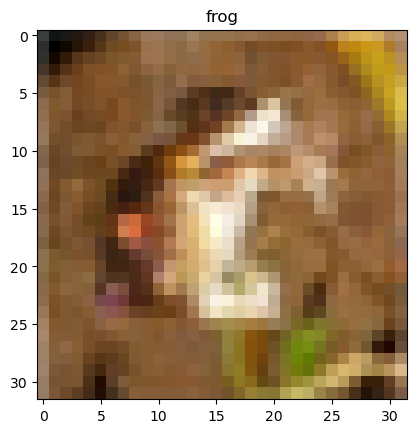

In [52]:
# [테스트] Dataset & DataLoader
# 지금 데이터에 있는 픽셀값을 넣어서 그림 볼라고~~~

for data, target in cifarDL:
    
    print(target)
    print(data.shape) 

    data1 = data.squeeze()
    print(data1.shape)
    
    plt.imshow(data1.T) 
    # plt.imshow(data1.transpose(0,2)) 
    plt.title(cifarDS.classes[target.item()])
    break

## torch.Size([1, 3, 32, 32]) 채널이 가장 앞으로 
## 그림 그리기 위해서 32,32,3의 형태로 만들어야 함 

tensor([6]) 6
torch.Size([1, 3, 32, 32])
(1, 3, 32, 32)
(3, 32, 32)


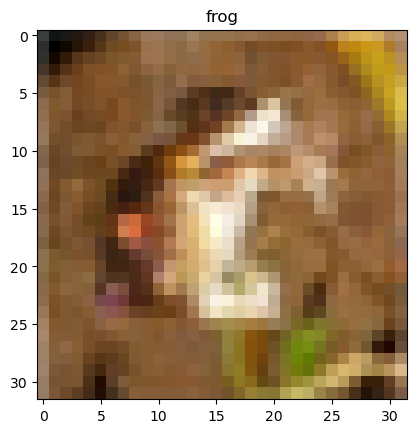

In [53]:
# [테스트] Dataset & DataLoader
# 지금 데이터에 있는 픽셀값을 넣어서 그림 볼라고~~~


for data, target in cifarDL:
    print(target, target.item())
    print(data.shape)

    data1 = data.numpy()
    print(data1.shape)

    data1 = data.numpy().squeeze()
    print(data1.shape)
    
    plt.imshow(data1.T) 
    # plt.imshow(data1.transpose(0,2)) 
    plt.title(cifarDS.classes[target.item()])
    break

## torch.Size([1, 3, 32, 32]) 채널이 가장 앞으로 
## 그림 그리기 위해서 32,32,3의 형태로 만들어야 함 

In [54]:
BATCH_SIZE = 1 # 원래는 50했었는데 밑에 부분때문에 target이 50개가나와서 일단 지금 1줌
cifarDL = DataLoader(cifarDS, batch_size = BATCH_SIZE)

tensor([[[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ..., 0

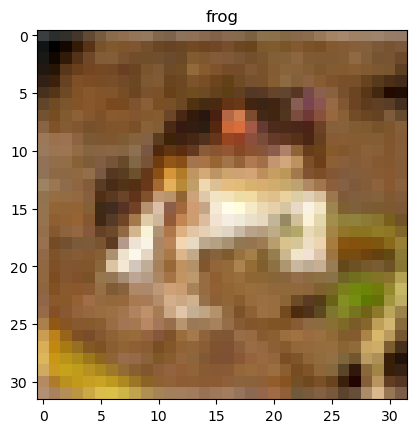

In [67]:
for data, target in cifarDL:
    print(data)
    print(target)
    break

INDEX = 0

data1 = data[[INDEX]].squeeze()
data2 = data1.permute(1,2,0)
print(data.shape)
print(data1.shape)
print(data2.shape)
name = [key for key, value in cifarDS.class_to_idx.items() if value == target[INDEX].item()][0]
plt.title(name)
plt.imshow(data2) # (height, width, channel) 형태로 줘야 함
plt.show()

[3] 커스텀 모델 설계 및 정의 <hr>
- 모델목적 : 이미지 분류 모델
- 학습 방법 : 지도학습 > 분류 > 다중분류(10가지)
- 클래스 이름 : ImageMCF
- 클래스 구조 : 특징 추출부분 => CNN + 학습부분 FC
- 부모 클래스 : nn.Module

In [56]:
class ImageMCF(nn.Module):
    
    # 모델 구조 설계 즉, 생성자 메서드
    def __init__(self):
       
        # 부모 생성
        super().__init__()
        
        ## 모델 층 구성
        # 특징 추출 층
        self.in_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
        self.p_layer = nn.MaxPool2d(kernel_size=2, stride=2)

        # 학습 관련 층
        self.hd_layer = nn.Linear(in_features=15*15*10, out_features=50)
        self.out_layer = nn.Linear(in_features=50, out_features=10)

    # 전방향/순방향 학습 메서드
    def forward(self, input):
        
        # 합성곱 계층
        output = self.in_layer(input)
        print(f'[output1] {output.shape}')
        output = F.relu(output)
        print(f'[output2] {output.shape}')

        # 풀링 계층
        output = self.p_layer(output)
        print(f'[output3] {output.shape}')

        # 은닉 계층
        output = output.view(output.shape[0], -1)
        print(f'[output4] {output.shape}')
        output = F.relu(self.hd_layer(output))
        print(f'[output5] {output.shape}')

        # 출력 계층
        output = self.out_layer(output)
        print(f'[output6] {output.shape}')

        return output


In [57]:
# [테스트] 모델 인스턴스 생성
m= ImageMCF()

In [58]:
from torchinfo import summary
summary(m)

Layer (type:depth-idx)                   Param #
ImageMCF                                 --
├─Conv2d: 1-1                            280
├─MaxPool2d: 1-2                         --
├─Linear: 1-3                            112,550
├─Linear: 1-4                            510
Total params: 113,340
Trainable params: 113,340
Non-trainable params: 0

In [59]:
## [테스트] Dataset & DataLoader
for data, target in cifarDL:
    print(f'[target] => {target}')
    print(data.shape)

    # 학습
    pre = m(data)
    print(f'pre => {pre.argmax(dim=1)}')
    break

[target] => tensor([6])
torch.Size([1, 3, 32, 32])
[output1] torch.Size([1, 10, 30, 30])
[output2] torch.Size([1, 10, 30, 30])
[output3] torch.Size([1, 10, 15, 15])
[output4] torch.Size([1, 2250])
[output5] torch.Size([1, 50])
[output6] torch.Size([1, 10])
pre => tensor([3])


In [60]:
# 모델 파라미터 확인
for name, param in m.named_parameters():
    print(f'>>[{name}]-------- \n{param.shape}')

>>[in_layer.weight]-------- 
torch.Size([10, 3, 3, 3])
>>[in_layer.bias]-------- 
torch.Size([10])
>>[hd_layer.weight]-------- 
torch.Size([50, 2250])
>>[hd_layer.bias]-------- 
torch.Size([50])
>>[out_layer.weight]-------- 
torch.Size([10, 50])
>>[out_layer.bias]-------- 
torch.Size([10])


In [61]:
class ImageMCF2(nn.Module):
    
    # 모델 구조 설계 즉, 생성자 메서드
    def __init__(self):
       
        # 부모 생성
        super().__init__()
        
        ## 모델 층 구성
        # 특징 추출 층
        self.cnn_layer = nn.Sequential(  
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)) # 혹여나 pool 이 나눠서 나머지가 나온경우 나머지 버린다

        # 학습 관련 층
        self.hd_layer = nn.Linear(in_features=10*16*16, out_features=50)
        self.out_layer = nn.Linear(in_features=50, out_features=10)


    # 전방향/순방향 학습 메서드
    def forward(self, input):
        
        # 이미지 특징 맵 추출
        output = self.cnn_layer(input)
        print(f'[cnn_layer output] {output.shape}')

        # 4D -> 2D(샘플수, 피쳐수)
        output = output.view(output.shape[0],-1)
        print(f'[view.output] {output.shape}')

        output = F.relu(self.hd_layer(output))
        print(f'[hd_layer output] {output.shape}')

        # 출력 계층
        output = self.out_layer(output)
        print(f'[out_layer output6] {output.shape}')

        return output


In [62]:
# [테스트] 모델 인스턴스 생성
m2 = ImageMCF2()

summary(m2)

Layer (type:depth-idx)                   Param #
ImageMCF2                                --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       100
│    └─BatchNorm2d: 2-2                  20
│    └─ReLU: 2-3                         --
│    └─MaxPool2d: 2-4                    --
├─Linear: 1-2                            128,050
├─Linear: 1-3                            510
Total params: 128,680
Trainable params: 128,680
Non-trainable params: 0

In [63]:
class ImageMCF3(nn.Module):
    # 모델 구조 설계 즉, 생성자 메서드
    def __init__(self):
        # 부모 생성
        super().__init__()
        # 모델 층 구성
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # stride=2은 size가 2이기에 생략가능
        )
        # (1 x 3 x 32 x 32) => (1, 10, 15, 15)

        self.cnn_layer2 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=30, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # (1, 10, 15, 15) => (1, 30, 6, 6)

        # 학습 관련 층
        self.hd_layer = nn.Linear(in_features=30*6*6, out_features=50)
        self.out_layer = nn.Linear(in_features=50, out_features=10)

    # 전방향/순방향 학습 메서드
    def forward(self, input):
        # 이미지 특징 맵 추출
        output = self.cnn_layer(input)
        print(f'[cnn_layer output] {output.shape}')

        output = self.cnn_layer2(output)
        print(f'[cnn_layer output] {output.shape}')

        # 4D -> 2D (샘플수, 피쳐수)
        output = output.view(output.shape[0], -1)
        print(f'[view output] {output.shape}')

        output = F.relu(self.hd_layer(output))
        print(f'[hd_layer output5] {output.shape}')

        # 출력 계층
        output = self.out_layer(output)
        print(f'[out_layer output6] {output.shape}')

        return output

In [64]:
# [테스트] 모델 인스턴스 생성
m3 = ImageMCF3()

summary(m3)

Layer (type:depth-idx)                   Param #
ImageMCF3                                --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─MaxPool2d: 2-3                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-4                       2,730
│    └─ReLU: 2-5                         --
│    └─MaxPool2d: 2-6                    --
├─Linear: 1-3                            54,050
├─Linear: 1-4                            510
Total params: 57,570
Trainable params: 57,570
Non-trainable params: 0

In [65]:
# [테스트] Dataset, DataLoader
for data, target in cifarDL:
    print(f'[target] => {target}')
    print(data.shape)
    pre = m3(data)
    print(f'pre => {pre.argmax(dim=1)}')
    break

[target] => tensor([6])
torch.Size([1, 3, 32, 32])
[cnn_layer output] torch.Size([1, 10, 15, 15])
[cnn_layer output] torch.Size([1, 30, 6, 6])
[view output] torch.Size([1, 1080])
[hd_layer output5] torch.Size([1, 50])
[out_layer output6] torch.Size([1, 10])
pre => tensor([7])


In [66]:
for name, param in m3.named_parameters():
    print(f'>>[{name}]----------\n{param.shape}')

>>[cnn_layer.0.weight]----------
torch.Size([10, 3, 3, 3])
>>[cnn_layer.0.bias]----------
torch.Size([10])
>>[cnn_layer2.0.weight]----------
torch.Size([30, 10, 3, 3])
>>[cnn_layer2.0.bias]----------
torch.Size([30])
>>[hd_layer.weight]----------
torch.Size([50, 1080])
>>[hd_layer.bias]----------
torch.Size([50])
>>[out_layer.weight]----------
torch.Size([10, 50])
>>[out_layer.bias]----------
torch.Size([10])
